# Análisis discriminante cuadrático (QDA)

**Análisis discriminante Gaussiano (GDA)** asume que las posteriors pueden expresarse con un modelo generativo de densidades condicionales Gaussianas:
$$p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})%
\propto p(y=c;\boldsymbol{\theta})\,p(\boldsymbol{x}\mid y=c;\boldsymbol{\theta})%
=\pi_c\,\mathcal{N}_D(\boldsymbol{\mu}_c,\mathbf{\Sigma}_c)$$
Vista como función de la entrada $\boldsymbol{x}$, la log-posterior (no normalizada) recibe el nombre de **función discriminante** ya que permite discriminar clases de posterior máxima:
$$\log p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})%
\propto\log\pi_c-\frac{D}{2}\log(2\pi)-\frac{1}{2}\log\vert\mathbf{\Sigma}_c\vert
-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu}_c)^t\mathbf{\Sigma}_c^{-1}(\boldsymbol{x}-\boldsymbol{\mu}_c)$$
**Análisis discriminante cuadrático (QDA)** emplea estas funciones discriminantes para clasificar; el calificativo cuadrático se debe a que las discriminantes son cuadráticas con la entrada $\boldsymbol{x}$:
$$\begin{align*}
\log p(y=c\mid\boldsymbol{x};\boldsymbol{\theta})%
&\propto\boldsymbol{x}^t\mathbf{A}_c\boldsymbol{x}+\boldsymbol{\beta}_c^t\boldsymbol{x}+\gamma_c+\kappa\\%
\mathbf{A}_c&=-\frac{1}{2}\mathbf{\Sigma}_c^{-1}\\%
\boldsymbol{\beta}_c&=\mathbf{\Sigma}_c^{-1}\boldsymbol{\mu}_c\\%
\gamma_c&=\log\pi_c-\frac{1}{2}\log\vert\mathbf{\Sigma}_c\vert-\frac{1}{2}\boldsymbol{\mu}_c^t\mathbf{\Sigma}_c^{-1}\boldsymbol{\mu}_c\\%
\kappa&=-\frac{D}{2}\log(2\pi)%
\end{align*}$$
Claramente, el término $\kappa$ puede ignorarse al determinar una clase de posterior máxima.

**Ejemplo:** $\;C=3$, $\;D=2$, $\;\pi_1=\pi_2=\pi_3=1/3$ (podemos ignorar $\log \pi_c$ en $\gamma_c$)
$$\begin{align*}
\boldsymbol{\mu}_1&=(0, 0)^t & \boldsymbol{\mu}_2&=(0, 4)^t & \boldsymbol{\mu}_3&=(4, 4)^t\\%
\mathbf{\Sigma}_1&=\begin{pmatrix}4&1\\1&2\end{pmatrix}%
&\mathbf{\Sigma}_2&=\begin{pmatrix}2&0\\0&1\end{pmatrix}%
&\mathbf{\Sigma}_3&=\begin{pmatrix}1&0\\0&1\end{pmatrix}\\%
\mathbf{\Sigma}_1^{-1}&=\begin{pmatrix}2/7&-1/7\\-1/7&4/7\end{pmatrix}%
&\mathbf{\Sigma}_2^{-1}&=\begin{pmatrix}1/2&0\\0&1\end{pmatrix}%
&\mathbf{\Sigma}_3^{-1}&=\begin{pmatrix}1&0\\0&1\end{pmatrix}\\%
\mathbf{A}_1&=\begin{pmatrix}-1/7&1/14\\1/14&-2/7\end{pmatrix}%
&\mathbf{A}_2&=\begin{pmatrix}-1/4&0\\0&-1/2\end{pmatrix}%
&\mathbf{A}_3&=\begin{pmatrix}-1/2&0\\0&-1/2\end{pmatrix}\\%
\boldsymbol{\beta}_1&=(0, 0)^t & \boldsymbol{\beta}_2&=(0,4)^t & \boldsymbol{\beta}_3&=(4,4)^t\\%
\gamma_1&=-\frac{1}{2}\log 7=-0.973 & \gamma_2&=-\frac{1}{2}\log 2 - 8 = -8.3466 & \gamma_3&= -16%
\end{align*}$$

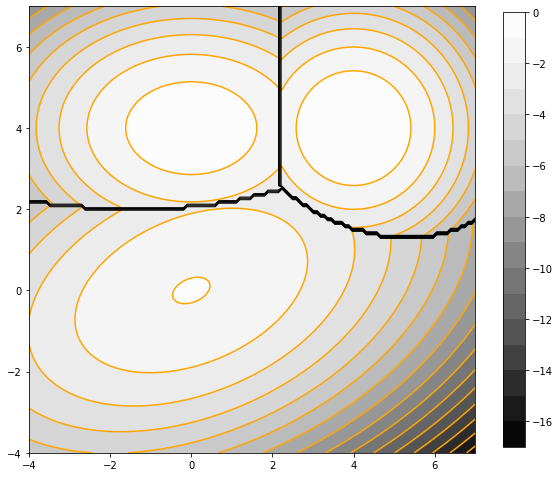

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A1, b1, c1 = np.array([ [-1/7, 1/14], [1/14,  -2/7] ]), np.array([0, 0]), -0.973
A2, b2, c2 = np.array([ [-1/4,    0], [   0,  -1/2] ]), np.array([0, 4]), -8.3466
A3, b3, c3 = np.array([ [-1/2,    0], [   0,  -1/2] ]), np.array([4, 4]), -16
x1, x2 = np.meshgrid(np.linspace(-4, 7, num=128), np.linspace(-4, 7, num=128))
x = np.c_[np.ravel(x1), np.ravel(x2)]
p1 =  lambda x: x.T @ A1 @ x + b1 @ x + c1
p2 =  lambda x: x.T @ A2 @ x + b2 @ x + c2
p3 =  lambda x: x.T @ A3 @ x + b3 @ x + c3
maxp = lambda x: max(p1(x), p2(x), p3(x))
maxpx = np.apply_along_axis(maxp, 1, x)
amaxp = lambda x: np.argmax([p1(x), p2(x), p3(x)])
amaxpx = np.apply_along_axis(amaxp, 1, x)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set(aspect='equal')
ax.contour(x1, x2, maxpx.reshape(x1.shape), 16, colors='orange', linestyles='solid')
cp = ax.contourf(x1, x2, maxpx.reshape(x1.shape), 16, cmap='Greys_r')
ax.contour(x1, x2, amaxpx.reshape(x1.shape), colors='black', linestyles='solid', linewidths=1)
plt.colorbar(cp, ax=ax, shrink=0.8);